#  데이터 불러오기 및 전처리

### 필요한 모듈 불러오기

In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')
import re

print("pandas version: ", pd.__version__)
pd.set_option('display.max_columns', 150)

pandas version:  1.2.4


## 1. 데이터셋

### 데이터 불러오기 및 합치기

In [2]:
solo = pd.read_csv("solo.csv",index_col=0)
duo = pd.read_csv("duo.csv",index_col=0)
squad = pd.read_csv("squad.csv",index_col=0)

In [3]:
solo['GameMode'] = 'solo'
duo['GameMode'] = 'duo'
squad['GameMode'] = 'squad'

total = pd.concat([solo,duo,squad]).reset_index(drop=True)
total

,player_name,KillDeathRatio,WinRatio,TimeSurvived,RoundsPlayed,Wins,WinTop10Ratio,Top10s,Top10Ratio,Losses,Rating,BestRating,DamagePg,HeadshotKillsPg,HealsPg,KillsPg,MoveDistancePg,RevivesPg,RoadKillsPg,TeamKillsPg,TimeSurvivedPg,Top10sPg,Kills,Assists,Suicides,TeamKills,HeadshotKills,HeadshotKillRatio,VehicleDestroys,RoadKills,DailyKills,WeeklyKills,RoundMostKills,MaxKillStreaks,Days,LongestTimeSurvived,MostSurvivalTime,AvgSurvivalTime,WinPoints,WalkDistance,RideDistance,MoveDistance,AvgWalkDistance,AvgRideDistance,LongestKill,Heals,Revives,Boosts,DamageDealt,DBNOs,GameMode
0,BreakNeck,3.14,17.65,18469.14,17,3,0.83,4,23.5,14,1559.78,1415.79,255.36,0.65,1.94,2.59,3321.28,0.00,0.00,0.00,1086.42,0.24,44,1,0,0,11,0.25,0,0,13,19,13,1,14,1909.66,1909.66,1262.83,2425,28924.31,27537.53,56461.84,2202.40,2764.50,304.87,33,0,29,4341.06,0,solo
1,Blackwalk,4.41,18.18,33014.86,33,6,0.36,11,33.3,27,1884.53,1860.74,393.04,1.27,1.82,3.61,5021.41,0.00,0.06,0.00,1000.45,0.33,119,2,0,0,42,0.35,3,2,18,18,13,3,10,1987.94,1987.94,1221.32,3812,47868.77,117837.74,165706.51,2017.38,5188.69,351.95,60,0,88,12970.39,0,solo
2,mercedes_benz,3.60,0.00,4330.44,5,0,0.00,1,20.0,5,1255.92,1266.60,329.76,0.60,1.00,3.60,2804.80,0.00,0.00,0.00,866.09,0.20,18,1,0,0,3,0.17,0,0,1,18,10,1,4,1578.31,1578.31,1133.17,2061,6340.79,7683.20,14023.99,1375.70,3052.50,125.76,5,0,3,1648.82,0,solo
3,DORA,14.00,50.00,13421.82,8,4,0.67,6,75.0,4,1798.70,1765.13,751.95,0.50,1.00,7.00,5986.82,0.00,0.00,0.00,1677.73,0.75,56,3,0,0,4,0.07,0,0,8,48,14,2,5,1980.79,1980.79,1677.73,1484,17579.69,30314.83,47894.53,2197.46,3789.35,412.25,8,0,24,6015.57,0,solo
4,n2tstar,10.50,33.33,9841.04,6,2,0.40,5,83.3,4,1668.67,1616.58,637.48,1.50,2.00,7.00,6526.96,0.00,0.00,0.00,1640.17,0.83,42,0,0,0,9,0.21,0,0,15,29,13,3,2,1923.71,1923.71,1640.17,1384,16736.41,22425.36,39161.77,2789.40,3737.56,307.97,12,0,21,3824.89,0,solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263689,SaikoMene,0.94,3.57,61987.40,56,2,0.05,23,41.1,54,1625.68,1648.14,130.10,0.16,2.43,0.91,3775.38,0.27,0.00,0.11,1106.92,0.41,51,17,1,6,9,0.18,1,0,0,0,6,3,16,1975.01,1975.01,1074.56,2398,106099.84,105321.37,211421.17,1863.11,1503.24,489.84,136,15,70,7285.37,41,squad
263690,KARUKOR,1.42,8.70,90025.75,92,8,0.07,37,40.2,84,1912.70,1923.01,156.96,0.14,1.55,1.29,2632.12,0.28,0.00,0.09,978.54,0.40,119,33,3,8,13,0.11,1,0,2,3,9,3,22,2112.99,2112.99,1050.24,3606,144046.67,98108.14,242154.75,1636.41,1590.67,235.24,143,26,72,14440.64,97,squad
263691,Dertydann,0.90,1.46,126889.24,137,2,0.18,41,29.9,135,1727.56,1758.74,116.34,0.08,1.15,0.89,2804.78,0.18,0.01,0.02,926.20,0.30,122,38,0,3,11,0.09,2,1,8,11,5,4,31,2138.18,2138.18,1121.51,3747,207191.54,177062.72,384254.27,2109.40,1088.12,453.87,157,24,95,15939.11,92,squad
263692,Neferhor,2.88,15.95,220702.25,163,26,0.41,104,63.8,137,2311.01,2311.73,348.90,0.47,2.44,2.42,5234.55,0.24,0.02,0.04,1354.00,0.64,395,106,4,6,77,0.19,14,3,19,49,11,4,30,2187.04,2187.04,1312.41,4194,330179.44,523052.83,853232.16,1785.15,1804.51,449.91,397,39,317,56870.07,350,squad


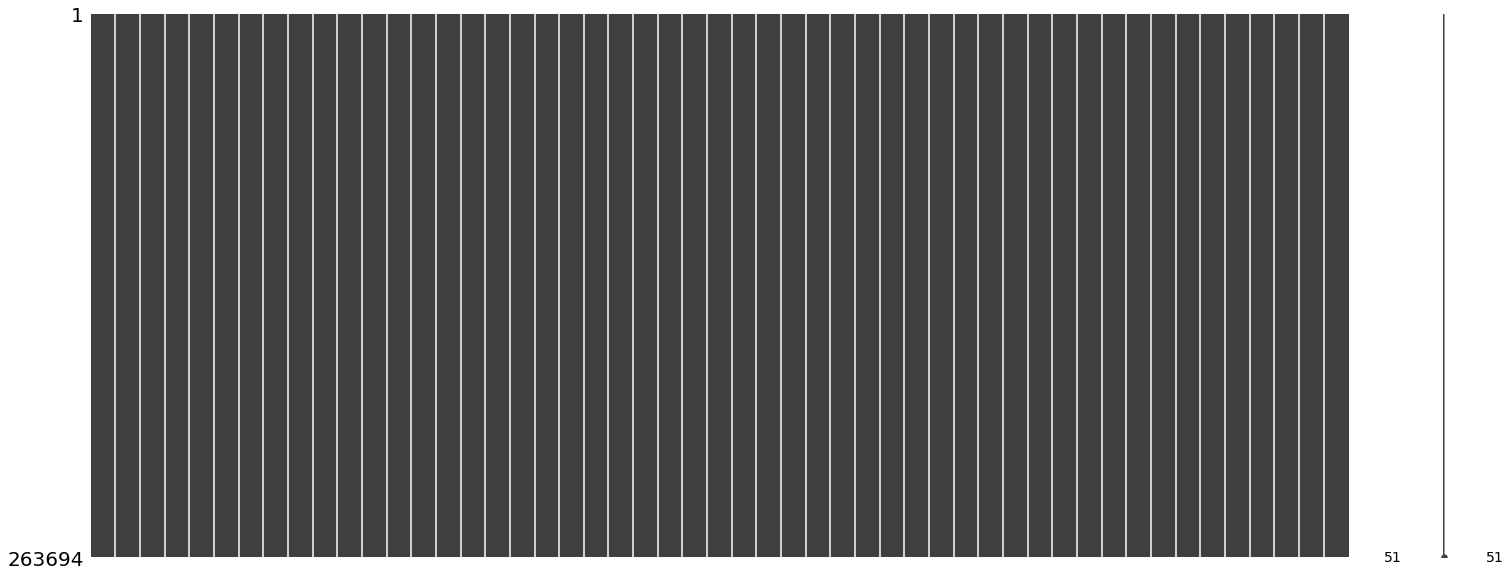

In [4]:
# 결측치 확인
msno.matrix(total)
plt.show()

## 2. 데이터 전처리

#### 데이터 전처리하기

In [5]:
# 겹치거나 필요없는 column 삭제
total.drop(columns=['HeadshotKillRatio','Top10sPg','AvgSurvivalTime', 'AvgWalkDistance','AvgRideDistance'],inplace=True)


## eda에 필요한 컬럼 튜닝
# 플레이어의 게임당 평균 이동거리 컬럼 생성
total["WalkDistancePg"] =  total["WalkDistance"]/total["RoundsPlayed"]
total["RideDistancePg"] =  total["RideDistance"]/total["RoundsPlayed"]
# 우승확률 컬럼 생성
total["WinRatio"] =  total["Wins"]/total["RoundsPlayed"]
# 게임당 부스트아이템 사용갯수 컬럼 생성
total["BoostsPg"] = total["Boosts"] / total["RoundsPlayed"]
# 게임당 차량파괴 컬럼 생성
total["VehicleDestPg"] = total["VehicleDestroys"] / total["RoundsPlayed"]


In [6]:
# 50개의 컬럼 중에 여러개의 feature가 avg,ratio, count컬럼으로 중복되어 있음.
total

,player_name,KillDeathRatio,WinRatio,TimeSurvived,RoundsPlayed,Wins,WinTop10Ratio,Top10s,Top10Ratio,Losses,Rating,BestRating,DamagePg,HeadshotKillsPg,HealsPg,KillsPg,MoveDistancePg,RevivesPg,RoadKillsPg,TeamKillsPg,TimeSurvivedPg,Kills,Assists,Suicides,TeamKills,HeadshotKills,VehicleDestroys,RoadKills,DailyKills,WeeklyKills,RoundMostKills,MaxKillStreaks,Days,LongestTimeSurvived,MostSurvivalTime,WinPoints,WalkDistance,RideDistance,MoveDistance,LongestKill,Heals,Revives,Boosts,DamageDealt,DBNOs,GameMode,WalkDistancePg,RideDistancePg,BoostsPg,VehicleDestPg
0,BreakNeck,3.14,0.176471,18469.14,17,3,0.83,4,23.5,14,1559.78,1415.79,255.36,0.65,1.94,2.59,3321.28,0.00,0.00,0.00,1086.42,44,1,0,0,11,0,0,13,19,13,1,14,1909.66,1909.66,2425,28924.31,27537.53,56461.84,304.87,33,0,29,4341.06,0,solo,1701.430000,1619.854706,1.705882,0.000000
1,Blackwalk,4.41,0.181818,33014.86,33,6,0.36,11,33.3,27,1884.53,1860.74,393.04,1.27,1.82,3.61,5021.41,0.00,0.06,0.00,1000.45,119,2,0,0,42,3,2,18,18,13,3,10,1987.94,1987.94,3812,47868.77,117837.74,165706.51,351.95,60,0,88,12970.39,0,solo,1450.568788,3570.840606,2.666667,0.090909
2,mercedes_benz,3.60,0.000000,4330.44,5,0,0.00,1,20.0,5,1255.92,1266.60,329.76,0.60,1.00,3.60,2804.80,0.00,0.00,0.00,866.09,18,1,0,0,3,0,0,1,18,10,1,4,1578.31,1578.31,2061,6340.79,7683.20,14023.99,125.76,5,0,3,1648.82,0,solo,1268.158000,1536.640000,0.600000,0.000000
3,DORA,14.00,0.500000,13421.82,8,4,0.67,6,75.0,4,1798.70,1765.13,751.95,0.50,1.00,7.00,5986.82,0.00,0.00,0.00,1677.73,56,3,0,0,4,0,0,8,48,14,2,5,1980.79,1980.79,1484,17579.69,30314.83,47894.53,412.25,8,0,24,6015.57,0,solo,2197.461250,3789.353750,3.000000,0.000000
4,n2tstar,10.50,0.333333,9841.04,6,2,0.40,5,83.3,4,1668.67,1616.58,637.48,1.50,2.00,7.00,6526.96,0.00,0.00,0.00,1640.17,42,0,0,0,9,0,0,15,29,13,3,2,1923.71,1923.71,1384,16736.41,22425.36,39161.77,307.97,12,0,21,3824.89,0,solo,2789.401667,3737.560000,3.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263689,SaikoMene,0.94,0.035714,61987.40,56,2,0.05,23,41.1,54,1625.68,1648.14,130.10,0.16,2.43,0.91,3775.38,0.27,0.00,0.11,1106.92,51,17,1,6,9,1,0,0,0,6,3,16,1975.01,1975.01,2398,106099.84,105321.37,211421.17,489.84,136,15,70,7285.37,41,squad,1894.640000,1880.738750,1.250000,0.017857
263690,KARUKOR,1.42,0.086957,90025.75,92,8,0.07,37,40.2,84,1912.70,1923.01,156.96,0.14,1.55,1.29,2632.12,0.28,0.00,0.09,978.54,119,33,3,8,13,1,0,2,3,9,3,22,2112.99,2112.99,3606,144046.67,98108.14,242154.75,235.24,143,26,72,14440.64,97,squad,1565.724674,1066.392826,0.782609,0.010870
263691,Dertydann,0.90,0.014599,126889.24,137,2,0.18,41,29.9,135,1727.56,1758.74,116.34,0.08,1.15,0.89,2804.78,0.18,0.01,0.02,926.20,122,38,0,3,11,2,1,8,11,5,4,31,2138.18,2138.18,3747,207191.54,177062.72,384254.27,453.87,157,24,95,15939.11,92,squad,1512.347007,1292.428613,0.693431,0.014599
263692,Neferhor,2.88,0.159509,220702.25,163,26,0.41,104,63.8,137,2311.01,2311.73,348.90,0.47,2.44,2.42,5234.55,0.24,0.02,0.04,1354.00,395,106,4,6,77,14,3,19,49,11,4,30,2187.04,2187.04,4194,330179.44,523052.83,853232.16,449.91,397,39,317,56870.07,350,squad,2025.640736,3208.913067,1.944785,0.085890


In [7]:
# ratio를 기준으로 겹치는 컬럼을 제외하고 데이터셋 만들기
# pg(게임당), ratio컬럼 / avg(평균)컬럼 / 수치컬럼 구분하기

#정규표현식
pg_regexp = re.compile(r"Pg")
ratio_regexp = re.compile(r"Ratio")
avg_regexp = re.compile(r"Avg")

ls = total.columns
PgRatio_col = []
avg_col = []
normal_col = []

# ratio컬럼 / avg(평균)컬럼 / 일반 컬럼 나눠담기
for data in ls:
    if ratio_regexp.search(data):
        PgRatio_col.append(data)
    elif pg_regexp.search(data):
        PgRatio_col.append(data)
    elif avg_regexp.search(data):
        avg_col.append(data)
    else:
        normal_col.append(data)

        
# 플레이어 네임과 top10확률에 영향을 미칠 것으로 예상되는 컬럼들을 ratio컬럼에 추가했다.
ls_test = ['player_name','BestRating','Rating','DailyKills','WeeklyKills','RoundMostKills','MaxKillStreaks',
     'LongestTimeSurvived','LongestKill','GameMode']
for i in ls_test:
    PgRatio_col.append(i)

total_ratio = total[PgRatio_col]
total_ratio

,KillDeathRatio,WinRatio,WinTop10Ratio,Top10Ratio,DamagePg,HeadshotKillsPg,HealsPg,KillsPg,MoveDistancePg,RevivesPg,RoadKillsPg,TeamKillsPg,TimeSurvivedPg,WalkDistancePg,RideDistancePg,BoostsPg,VehicleDestPg,player_name,BestRating,Rating,DailyKills,WeeklyKills,RoundMostKills,MaxKillStreaks,LongestTimeSurvived,LongestKill,GameMode
0,3.14,0.176471,0.83,23.5,255.36,0.65,1.94,2.59,3321.28,0.00,0.00,0.00,1086.42,1701.430000,1619.854706,1.705882,0.000000,BreakNeck,1415.79,1559.78,13,19,13,1,1909.66,304.87,solo
1,4.41,0.181818,0.36,33.3,393.04,1.27,1.82,3.61,5021.41,0.00,0.06,0.00,1000.45,1450.568788,3570.840606,2.666667,0.090909,Blackwalk,1860.74,1884.53,18,18,13,3,1987.94,351.95,solo
2,3.60,0.000000,0.00,20.0,329.76,0.60,1.00,3.60,2804.80,0.00,0.00,0.00,866.09,1268.158000,1536.640000,0.600000,0.000000,mercedes_benz,1266.60,1255.92,1,18,10,1,1578.31,125.76,solo
3,14.00,0.500000,0.67,75.0,751.95,0.50,1.00,7.00,5986.82,0.00,0.00,0.00,1677.73,2197.461250,3789.353750,3.000000,0.000000,DORA,1765.13,1798.70,8,48,14,2,1980.79,412.25,solo
4,10.50,0.333333,0.40,83.3,637.48,1.50,2.00,7.00,6526.96,0.00,0.00,0.00,1640.17,2789.401667,3737.560000,3.500000,0.000000,n2tstar,1616.58,1668.67,15,29,13,3,1923.71,307.97,solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263689,0.94,0.035714,0.05,41.1,130.10,0.16,2.43,0.91,3775.38,0.27,0.00,0.11,1106.92,1894.640000,1880.738750,1.250000,0.017857,SaikoMene,1648.14,1625.68,0,0,6,3,1975.01,489.84,squad
263690,1.42,0.086957,0.07,40.2,156.96,0.14,1.55,1.29,2632.12,0.28,0.00,0.09,978.54,1565.724674,1066.392826,0.782609,0.010870,KARUKOR,1923.01,1912.70,2,3,9,3,2112.99,235.24,squad
263691,0.90,0.014599,0.18,29.9,116.34,0.08,1.15,0.89,2804.78,0.18,0.01,0.02,926.20,1512.347007,1292.428613,0.693431,0.014599,Dertydann,1758.74,1727.56,8,11,5,4,2138.18,453.87,squad
263692,2.88,0.159509,0.41,63.8,348.90,0.47,2.44,2.42,5234.55,0.24,0.02,0.04,1354.00,2025.640736,3208.913067,1.944785,0.085890,Neferhor,2311.73,2311.01,19,49,11,4,2187.04,449.91,squad


#### 그룹간 비교를 위해 데이터 범주화

In [8]:
# 범주화 함수 만들기
# 연속형데이터의 범주형 컬럼만들기 함수
def create_range_data(df, col, bins_start, bins_end, bins_jump):
    df[f'{col}_range'] = pd.cut(df[f'{col}'],
                               bins=range(bins_start,bins_end+bins_jump,bins_jump),
                               include_lowest=True,
                               labels=range(bins_start+bins_jump,bins_end+bins_jump,bins_jump))
# 만들어진 컬럼 드랍 함수   
def drop_col(df, col):
    df.drop([f'{col}_range'], axis=1, inplace=True)

    
# Kill/Death에 따른 플레이어그룹 범주화
total_ratio.loc[total_ratio['KillDeathRatio']<=1, 'K/D_category'] = "초보"
total_ratio.loc[(total_ratio['KillDeathRatio']>1)&(total_ratio['KillDeathRatio']<=2), 'K/D_category'] = "보통"
total_ratio.loc[(total_ratio['KillDeathRatio']>2)&(total_ratio['KillDeathRatio']<=3), 'K/D_category'] = "고수"
total_ratio.loc[total_ratio['KillDeathRatio']>3, 'K/D_category'] = "초고수"

# top10확률에 따른 플레이어그룹 범주화
create_range_data(total_ratio,'Top10Ratio',0,100,10)
total_ratio['WinRatio_GoodBad'] = 0
total_ratio.loc[total_ratio['Top10Ratio_range']>=40, 'WinRatio_GoodBad'] = "good"
total_ratio.loc[total_ratio['Top10Ratio_range']<=40, 'WinRatio_GoodBad'] = "bad"
drop_col(total_ratio,'Top10Ratio')

In [9]:
## top10 확률이 100%인 플레이어들은 플레이횟수가 적어 신뢰성이 낮은 데이터로 판단. 제거하자.

In [10]:
# 이상치 제거
total_ratio = total_ratio[total_ratio['Top10Ratio']!=100]
total_ratio

,KillDeathRatio,WinRatio,WinTop10Ratio,Top10Ratio,DamagePg,HeadshotKillsPg,HealsPg,KillsPg,MoveDistancePg,RevivesPg,RoadKillsPg,TeamKillsPg,TimeSurvivedPg,WalkDistancePg,RideDistancePg,BoostsPg,VehicleDestPg,player_name,BestRating,Rating,DailyKills,WeeklyKills,RoundMostKills,MaxKillStreaks,LongestTimeSurvived,LongestKill,GameMode,K/D_category,WinRatio_GoodBad
0,3.14,0.176471,0.83,23.5,255.36,0.65,1.94,2.59,3321.28,0.00,0.00,0.00,1086.42,1701.430000,1619.854706,1.705882,0.000000,BreakNeck,1415.79,1559.78,13,19,13,1,1909.66,304.87,solo,초고수,bad
1,4.41,0.181818,0.36,33.3,393.04,1.27,1.82,3.61,5021.41,0.00,0.06,0.00,1000.45,1450.568788,3570.840606,2.666667,0.090909,Blackwalk,1860.74,1884.53,18,18,13,3,1987.94,351.95,solo,초고수,bad
2,3.60,0.000000,0.00,20.0,329.76,0.60,1.00,3.60,2804.80,0.00,0.00,0.00,866.09,1268.158000,1536.640000,0.600000,0.000000,mercedes_benz,1266.60,1255.92,1,18,10,1,1578.31,125.76,solo,초고수,bad
3,14.00,0.500000,0.67,75.0,751.95,0.50,1.00,7.00,5986.82,0.00,0.00,0.00,1677.73,2197.461250,3789.353750,3.000000,0.000000,DORA,1765.13,1798.70,8,48,14,2,1980.79,412.25,solo,초고수,good
4,10.50,0.333333,0.40,83.3,637.48,1.50,2.00,7.00,6526.96,0.00,0.00,0.00,1640.17,2789.401667,3737.560000,3.500000,0.000000,n2tstar,1616.58,1668.67,15,29,13,3,1923.71,307.97,solo,초고수,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263689,0.94,0.035714,0.05,41.1,130.10,0.16,2.43,0.91,3775.38,0.27,0.00,0.11,1106.92,1894.640000,1880.738750,1.250000,0.017857,SaikoMene,1648.14,1625.68,0,0,6,3,1975.01,489.84,squad,초보,good
263690,1.42,0.086957,0.07,40.2,156.96,0.14,1.55,1.29,2632.12,0.28,0.00,0.09,978.54,1565.724674,1066.392826,0.782609,0.010870,KARUKOR,1923.01,1912.70,2,3,9,3,2112.99,235.24,squad,보통,good
263691,0.90,0.014599,0.18,29.9,116.34,0.08,1.15,0.89,2804.78,0.18,0.01,0.02,926.20,1512.347007,1292.428613,0.693431,0.014599,Dertydann,1758.74,1727.56,8,11,5,4,2138.18,453.87,squad,초보,bad
263692,2.88,0.159509,0.41,63.8,348.90,0.47,2.44,2.42,5234.55,0.24,0.02,0.04,1354.00,2025.640736,3208.913067,1.944785,0.085890,Neferhor,2311.73,2311.01,19,49,11,4,2187.04,449.91,squad,고수,good


---